In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('voc_xywh.csv')
data = data.drop('Unnamed: 0', 1)
#data['File_Path'] = './VOCdevkit2007/VOC2007/JPEGImages/' + data['Frame']
#data = data[(data['label'] == 0)].reset_index()
print(data.head())

        Frame  x_center  y_center      w      h  label  type  \
0  003815.jpg     596.0     308.0  470.0  202.0    0.0  test   
1  003815.jpg     470.0      53.0   54.0  102.0    1.0  test   
2  003815.jpg     389.0      53.0   63.0  102.0    1.0  test   
3  003815.jpg     495.0     102.0   61.0  161.0    1.0  test   
4  003815.jpg     596.0     263.0   86.0   46.0    1.0  test   

                                        FileName  
0  ./VOCdevkit2007/VOC2007/JPEGImages/003815.jpg  
1  ./VOCdevkit2007/VOC2007/JPEGImages/003815.jpg  
2  ./VOCdevkit2007/VOC2007/JPEGImages/003815.jpg  
3  ./VOCdevkit2007/VOC2007/JPEGImages/003815.jpg  
4  ./VOCdevkit2007/VOC2007/JPEGImages/003815.jpg  


   index       Frame  x_center  y_center      w      h  label  type  \
0   4446  003167.jpg     178.0     276.0   98.0  428.0    1.0  test   
1   4447  003167.jpg     298.0     282.0  115.0  416.0    1.0  test   
2   4448  003167.jpg      67.0     427.0  131.0  427.0    1.0  test   
3   4449  003167.jpg     479.0     325.0  655.0  630.0    1.0  test   

                                        FileName  
0  ./VOCdevkit2007/VOC2007/JPEGImages/003167.jpg  
1  ./VOCdevkit2007/VOC2007/JPEGImages/003167.jpg  
2  ./VOCdevkit2007/VOC2007/JPEGImages/003167.jpg  
3  ./VOCdevkit2007/VOC2007/JPEGImages/003167.jpg  
[[ 129.    62.   227.   490. ]
 [ 240.5   74.   355.5  490. ]
 [   1.5  213.5  132.5  640.5]
 [ 151.5   10.   806.5  640. ]]


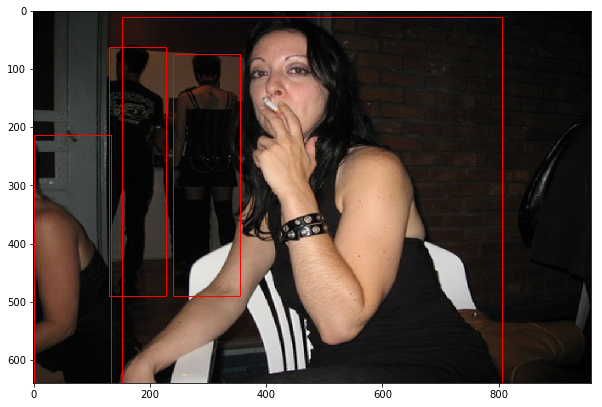

In [3]:
#This jupyter version only used on conv5-3, here I am not use multi-sclae features from different convolutional layer
import batch_generate
i_line = np.random.randint(len(data))
name_str, img, bb_boxes = batch_generate.get_img_by_name(data, i_line, size = (960, 640))
print(bb_boxes)
gta = batch_generate.bbox_transform(bb_boxes)
print(gta)
plt.figure(figsize=(10,10))
plt.imshow(img)
currentAxis = plt.gca()
for i in range(len(gta)):
    currentAxis.add_patch(plt.Rectangle((gta[i,0], gta[i,1]), gta[i,2]-gta[i,0], gta[i,3]-gta[i,1], fill=False, edgecolor= 'r', linewidth=1))

(21600, 4)


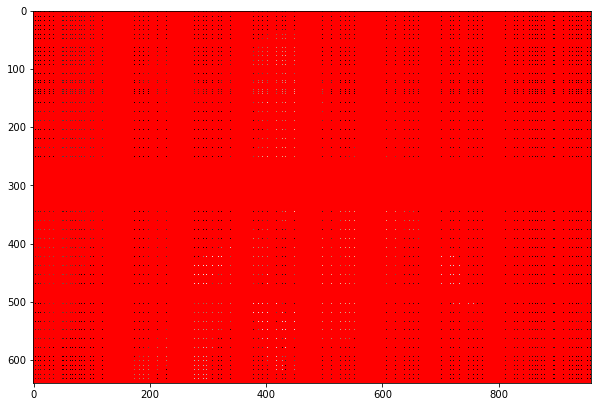

In [4]:
#shifts display
import config
mc = config.model_parameters()
print(mc.ANCHOR_BOX.shape)
anchor_box = mc.ANCHOR_BOX
anchors = batch_generate.bbox_transform(anchor_box, is_df = False)
plt.figure(figsize=(10,10))
plt.imshow(img)
currentAxis = plt.gca()
for i in range(len(anchors)):
    currentAxis.add_patch(plt.Rectangle((anchors[i,0], anchors[i,1]), anchors[i,2]-anchors[i,0], anchors[i,3]-anchors[i,1], fill=False, edgecolor= 'r', linewidth=1))

In [5]:
#now, start to product target label y(target fg/bg label)
print(anchor_box.shape)
anchor_box = np.expand_dims(anchor_box, axis = 0)
labels, bbox_targets, bbox_inside_weights, bbox_outside_weights = batch_generate.target_label_generate(bb_boxes, anchor_box, mc, DEBUG = True)
#print(idx)

(21600, 4)
the shape of overlaps table (21600, 4)
the number of groundtruth is 4
the number of valid anchor box is 21600
the shape of gt_argmax_overlaps is  (4,)
the value in gt_argmax_overlaps is  [ 6035  6647 14072 10496]
the shape of argmax_overlaps is  (21600,)
the value in argmax_overlaps is  [3 0 0 ..., 0 0 0]
the shape of processed gt_argmax_overlaps is  (25,)
the value in processed gt_argmax_overlaps is  [ 6035  6575  6647  8195  8267  8735  8807  9275  9347  9815  9887 10355
 10427 10496 10523 10895 10967 11435 11507 11576 11603 11975 12047 14072
 15152]
the shape of max overlaps table is  (21600,)
the number of postive samples is  25
the number os negative samples is  18982
After subsampling, the number of postive samples is  25
After subsampling, the number os negative samples is  231
the shape of target_delta is  (21600, 4)
the shape of bbox_in_w is  (21600, 4)
the shape of bbox_out_w is  (21600, 4)
the shape of target labels is  (21600,)
the shape of bbox_target is (21600,

[ 6035  6575  6647  8195  8267  8735  8807  9275  9347  9815  9887 10355
 10427 10496 10523 10895 10967 11435 11507 11576 11603 11975 12047 14072
 15152]


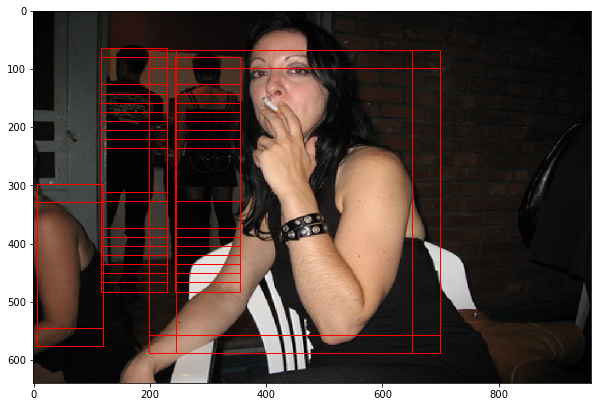

In [6]:
postive_samples = np.where(labels == 1)[0]
print(postive_samples)
box = anchors[postive_samples,:]
plt.figure(figsize=(10,10))
plt.imshow(img)
currentAxis = plt.gca()
for i in range(len(box)):
    currentAxis.add_patch(plt.Rectangle((box[i,0], box[i,1]), box[i,2]-box[i,0], box[i,3]-box[i,1], fill=False, edgecolor= 'r', linewidth=1))

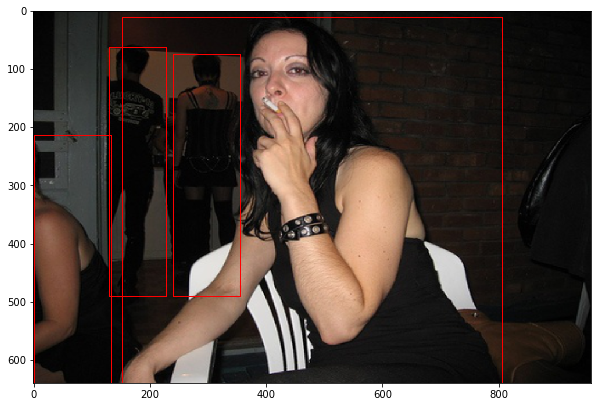

In [7]:
import utils
ref_box = anchor_box[0]
coords = utils.bbox_delta_convert_inv(ref_box[postive_samples], bbox_targets[postive_samples])
plt.figure(figsize=(10,10))
plt.imshow(img)
currentAxis = plt.gca()
for i in range(len(coords)):
    currentAxis.add_patch(plt.Rectangle((coords[i,0], coords[i,1]), coords[i,2]-coords[i,0], coords[i,3]-coords[i,1], fill=False, edgecolor= 'r', linewidth=1))